# Velocity Control in Python

In [1]:
import ZaberLSMDevice as z

import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# Create a device object
LSM = z.ZaberLSMDevice()

# Home the device
if LSM.get_position() != 0:
    LSM.home()

# Move to 25 mm

LSM.move_absolute(25)
START_POSITION = LSM.get_position()

Detected 1 devices


In [7]:
def current_milli_time():
    return round(time.time() * 1000)

# Define a trajectory
START_TIME = 0
END_TIME = 6
SAMPLE_RATE = 1000
SAMPLE_PERIOD = 1/SAMPLE_RATE
T = 2
omega = 2*np.pi/T

# Sine wave trajectory
p_des = START_POSITION + np.sin(omega*np.arange(START_TIME, END_TIME, SAMPLE_PERIOD))
dp_des = np.gradient(p_des, SAMPLE_PERIOD)
l_traj = len(dp_des)

# PID control
Kp = 1

# Run the loop

start = current_milli_time() # start time in milliseconds
p = []
t = []



while (current_milli_time() - start) < END_TIME*1000:
    # Get current time in milliseconds
    t.append(current_milli_time() - start) # index of trajectory

    # Get current position
    p.append(LSM.get_position())

    u = dp_des[t[-1] % l_traj] + Kp * (p_des[t[-1] % l_traj] - p[-1]) # control velocity

    print(f't: {t[-1]}, p: {p[-1]}, u: {u}', end='\r')
    
    LSM.move_velocity(u)

LSM.stop()


: 

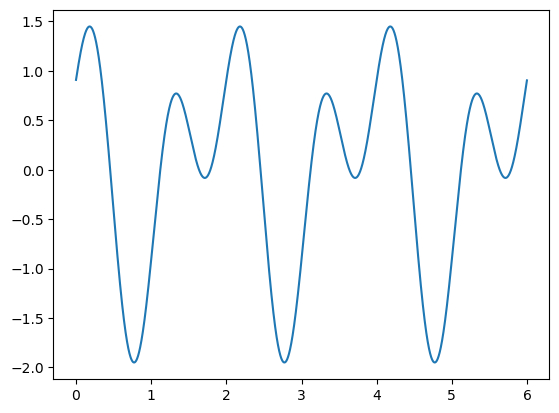

In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

t = np.arange(0,6,0.001)
T = 1
omega = 2*np.pi/T
p_des = np.sin(omega*t) + np.sin(omega*t/2 + 2)

plt.plot(t, p_des)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

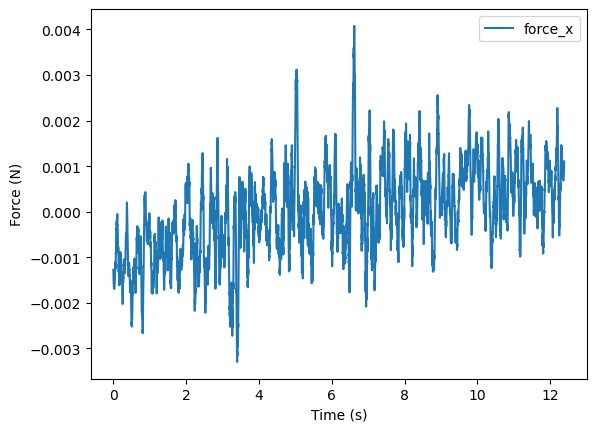

In [17]:
data = pd.read_csv('data/LSM_ATI_noise.csv')

# filter data with SG
filter_window = 50
data['force_x'] = savgol_filter(data['force_x'], filter_window, 3)
data['force_y'] = savgol_filter(data['force_y'], filter_window, 3)
data['force_z'] = savgol_filter(data['force_z'], filter_window, 3)

FORCES = ['force_x', 'force_y', 'force_z']

data['timestamp'] = data['timestamp'] - data['timestamp'][0]

fig, ax = plt.subplots()

ax.plot(data['timestamp'], data[FORCES[1]])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Force (N)')
ax.legend(FORCES)

plt.show()